In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test)= datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 88s 1us/step


(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)

In [73]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [74]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

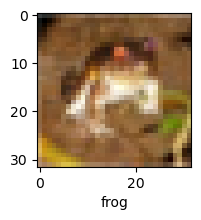

In [75]:
plot_sample(x_train, y_train, 0)

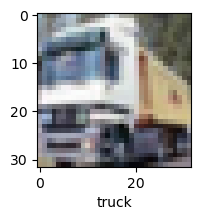

In [76]:
plot_sample(x_train, y_train, 1)

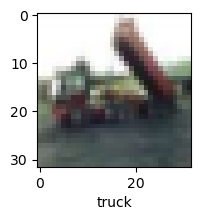

In [77]:
plot_sample(x_train, y_train, 2)

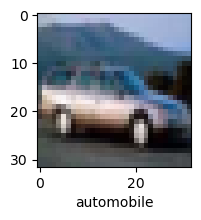

In [78]:
plot_sample(x_train, y_train, 4)

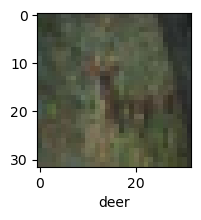

In [79]:
plot_sample(x_train, y_train, 10)

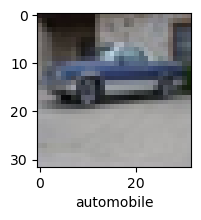

In [80]:
plot_sample(x_train, y_train, 10000)

In [81]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# dont do this
from below

In [82]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation ='relu'),
    layers.Dense(10, activation ='softmax')
])

In [83]:
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 26s 16ms/step - loss: 2.3009 - accuracy: 0.1279
Epoch 2/5
1563/1563 [==============================] - 26s 17ms/step - loss: 2.2997 - accuracy: 0.1290
Epoch 3/5
1563/1563 [==============================] - 26s 16ms/step - loss: 2.2988 - accuracy: 0.1415
Epoch 4/5
1563/1563 [==============================] - 26s 17ms/step - loss: 2.2978 - accuracy: 0.1571
Epoch 5/5
1563/1563 [==============================] - 27s 17ms/step - loss: 2.2966 - accuracy: 0.1466


In [84]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

In [85]:
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('classification Report: \n', classification_report(y_test , y_pred_classes))

313/313 [==============================] - 2s 5ms/step
classification Report: 
               precision    recall  f1-score   support

           0       0.32      0.40      0.35      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.16      0.63      0.25      1000
           6       0.30      0.18      0.22      1000
           7       0.00      0.00      0.00      1000
           8       0.29      0.57      0.39      1000
           9       0.26      0.56      0.36      1000

    accuracy                           0.23     10000
   macro avg       0.13      0.23      0.16     10000
weighted avg       0.13      0.23      0.16     10000



/Users/reeses/anaconda3/envs/e4_jupyter_notebook/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/reeses/anaconda3/envs/e4_jupyter_notebook/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/reeses/anaconda3/envs/e4_jupyter_notebook/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

# instead do this

In [86]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [87]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [100]:
cnn.fit(x_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3027 - accuracy: 0.0983
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0999
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0976
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0972
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0975
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0993
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0962
Epoch 8/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3027 - accuracy: 0.0998
Epoch 9/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0984
Epoch 10/50
1563/1563 [==============================] - 11s 7ms/step - l

In [101]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3026368618011475, 0.10000000149011612]

In [102]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[0.10018449, 0.10127763, 0.10115276, 0.09809852, 0.0995571 ,
        0.09954561, 0.10016283, 0.10074851, 0.09851816, 0.10075435],
       [0.10018449, 0.10127763, 0.10115276, 0.09809852, 0.0995571 ,
        0.09954561, 0.10016283, 0.10074851, 0.09851816, 0.10075435],
       [0.10018449, 0.10127763, 0.10115276, 0.09809852, 0.0995571 ,
        0.09954561, 0.10016283, 0.10074851, 0.09851816, 0.10075435],
       [0.10018449, 0.10127763, 0.10115276, 0.09809852, 0.0995571 ,
        0.09954561, 0.10016283, 0.10074851, 0.09851816, 0.10075435],
       [0.10018449, 0.10127763, 0.10115276, 0.09809852, 0.0995571 ,
        0.09954561, 0.10016283, 0.10074851, 0.09851816, 0.10075435]],
      dtype=float32)

In [103]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[1, 1, 1, 1, 1]

In [104]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

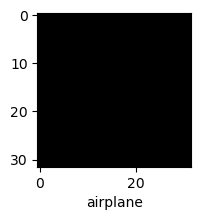

In [105]:
plot_sample(x_test, y_test, 3)

In [106]:
classes[y_classes[3]]

'automobile'